# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [57]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [58]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT IDSS/Foundations of Data Science/Project Assessment - FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [60]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [61]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*    Data stored as int64 : order_id, customer_id , food_preparation_time, delivery_time
*    Data stored as float64 : cost_of_the_order
*    Data stored as object : restaurant_name, cuisine_type, day_of_the_week,rating  

#### Datatypes:
*     Categorical :  restaurant_name , cuisine_type, day_of_week, rating,
*     Quantitative:  cost_of_the_order , food_preparation_time ,  delivery_time  

1.    customer_id do not have a meaningful numeric relationship and is considered as categorical<br>
2.    **order_id** also do not have a meaningful numeric relationship and is considered as categorical. But in the context of this study, it is also the **primary key** or unique identifier


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [62]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
*    There are no nulls in the dataset
*    rating feature of the data set has "Not given" which is actually missing customer ratings.

In [63]:
# "Not given" values in ratings are missing data in customer ratings
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

**How to treat the "Not given" values in rating feature**

Explore the "Not given" values in rating feature to see what could have caused the missing values .

A better understanding of the statistical summary of the dataset is required to also make the decision to whether to imput or remove the values

For now , we would KIV until we further explore the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [64]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [65]:
# Write your code here
df["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
**food_preperation feature**

Minimum time it takes for food to be prepared : is 20 mins
Average time taken for food to be prepared: is 27.371 mins
Maximum time it takes for food to be prepared : is 35 mins


### **Question 5:** How many orders are not rated?

In [66]:
# Write the code here
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [67]:
# Write the code here
df["rating"].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

#### Observations:
*    There are 736 orders that are not rated out of a total of 1898 orders.
*    About 38.7%, quite a large chunk!

### Exploratory Data Analysis (EDA)

**Check Primary Key / unique identifier**

In [68]:
df["order_id"].nunique()

1898

In [69]:
df["order_id"].isnull().sum()

0

The order_id is the unique identifier of this dataset. <br>
There are 1898 unique order_id matching the total number of rows in this feature. <br>
There are also no null values in this feature

In [70]:
# Explore the categorical variables
cat_cols = ["restaurant_name", "cuisine_type", "day_of_the_week", "rating"]

#Using For Loop to iterate over each column and do a count of the number of values that exist for each feature
for column in cat_cols:
  print(df[column].value_counts())

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [71]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
  print(df[column].value_counts(normalize=True))

restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64
cuisine_type
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: proportion, dtype: float64
day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64
rating


**Observations**
*   There are many unique restaurant names in the restaurant_name feature. The mode of this feature is Shake Shack which accounts for about 11.5% of the orders
*   The top 5 most ordered cuisine_types are : American 30.7%, Japanese 24.7%, Italian 15.7%, Chinese 11.3%, Mexican 4%
*   There are more weekend orders which accounted for about 71.1%  compared to weekday orders which accounts for 28.8%
*   Analysing the customer ratings would give insights into customer experience and so the missing 38% of customer rating information would be troublesome, something to revisit later on

These observations would be further elaborated in the visualizations below

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**Distribution of cost of the orders**

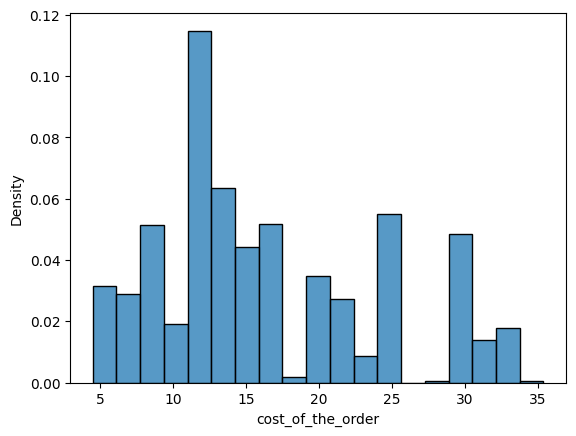

<Axes: xlabel='cost_of_the_order'>

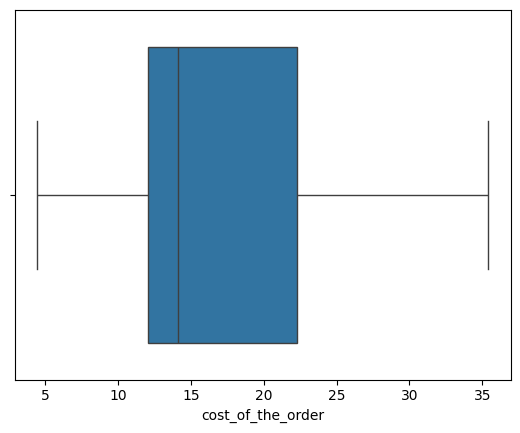

In [72]:
# Exploring distribution of cost of the orders
sns.histplot(data=df, x = "cost_of_the_order", stat="density")
plt.show()
sns.boxplot(data=df, x="cost_of_the_order")

**Observation on cost_of_the_order**

The cost of orders generally ranges between 5 and 35 dollars.
Most orders are concentrated around 10, 15, and 25 dollars
The whiskers are approximately symmetric around the median, but the right whisker extends slightly longer than the left whisker, suggesting a slight right skew.

**Distribution of food preperation time**

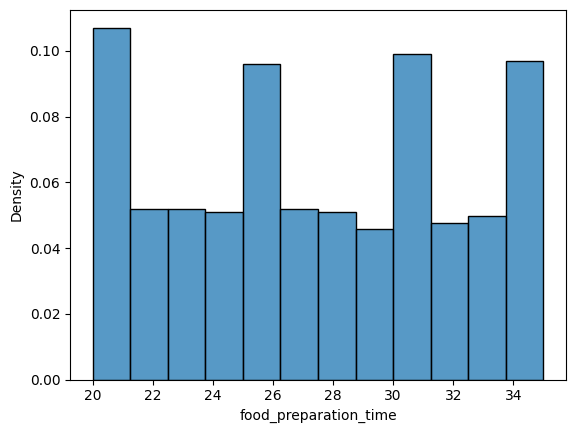

<Axes: xlabel='food_preparation_time'>

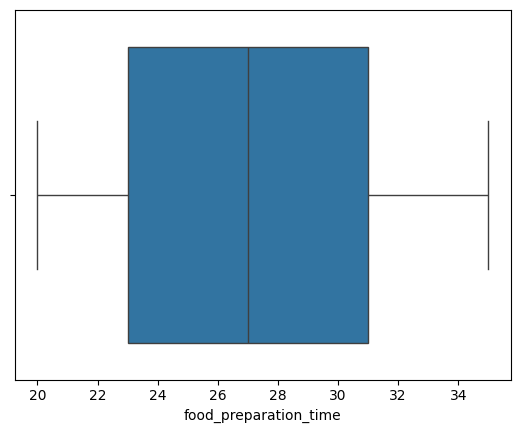

In [73]:
#Distribution of food preperation time
sns.histplot(data=df, x = "food_preparation_time", stat="density")
plt.show()
sns.boxplot(data=df, x="food_preparation_time")

**Observation on food_preparation_time**
Food preperation times has the highest densities are around 20, 26, 30, and 34 minutes, suggesting that these are common preparation times.

**Distribution of delivery time**

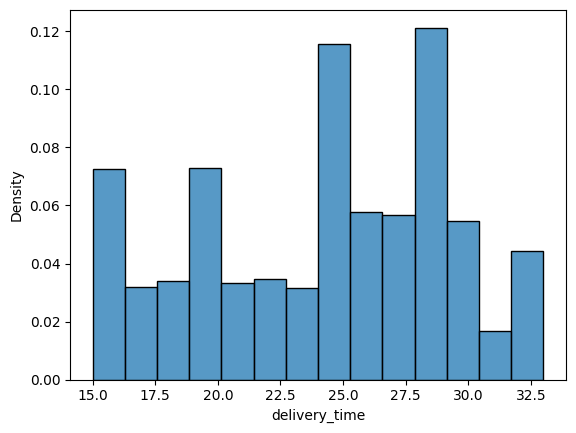

<Axes: xlabel='delivery_time'>

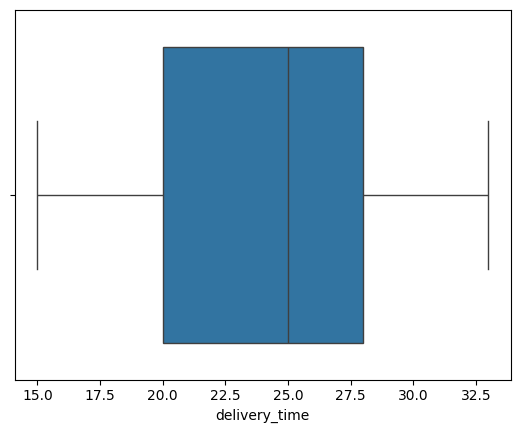

In [74]:
#Distribution of the delivery time feature
sns.histplot(data=df, x = "delivery_time", stat="density")
plt.show()
sns.boxplot(data=df, x="delivery_time")

**Observation on delivery time**

Delivery times has the highest densities are around 15, 20, 25, and 34 minutes, suggesting that there are higher population density areas with either more F&B estabilishments or people ordering food

**Distribution of cuisine type**

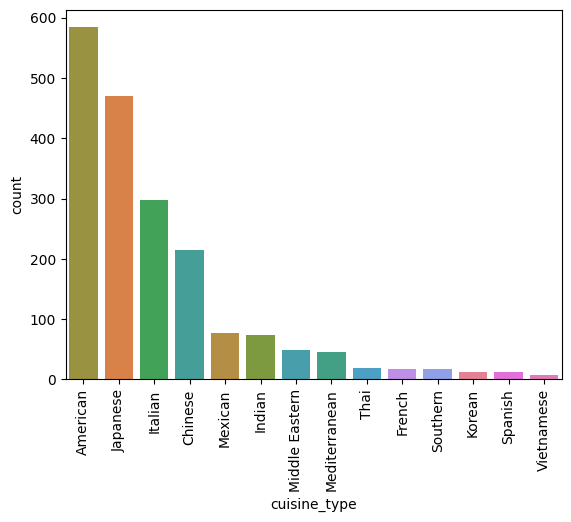

In [75]:
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, hue='cuisine_type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [76]:
# Write the code here
df["cuisine_type"].value_counts(normalize=True)

cuisine_type
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: proportion, dtype: float64

**Observation on distibution of cuisine type**
The top 5 most ordered cuisine_types are : American 30.7%, Japanese 24.7%, Italian 15.7%, Chinese 11.3%, Mexican 4%

**Distribution of day_of_week**

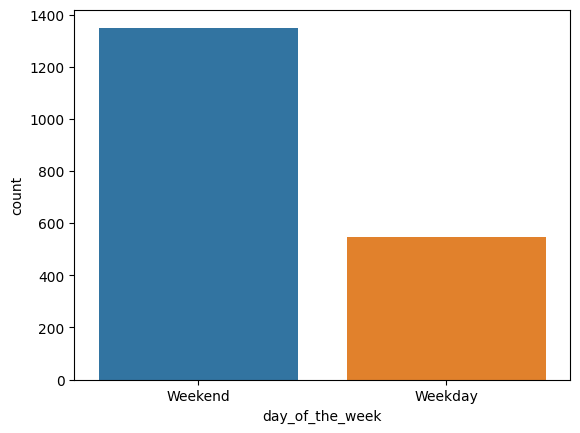

In [77]:
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.show()

**Observation on distibution of day of the week**


There are more weekend orders which accounted for about 71.1%  compared to weekday orders which accounts for 28.8%

**Distribution of rating**

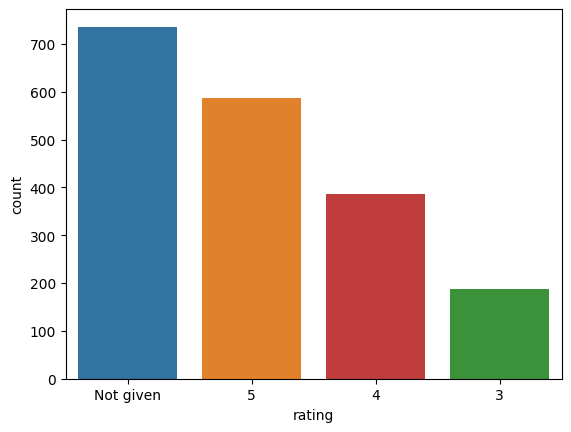

In [78]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, hue='rating')
plt.show()

**Observation on distibution of rating**

*    38% of customer ratings are "Not given" and
*    most of the ratings fall under 5 about 30.0% and 4 about 20.3% then 3 which is 9%
*    the data is strangely biased with no rows containing 1 and 2



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [79]:
# Write the code here
print(df['restaurant_name'].value_counts().head(5))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
Top 5 restaurants in terms of the number of orders recieved are:

1.    Shake Shack
2.    The Meatball shop
3.    Blue Ribbon Sushi
4.    Blue Ribbon Fried Chicken
5.    Parm


### **Question 8**: Which is the most popular cuisine on weekends?

In [80]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

In [81]:
cuisine_counts = weekend_orders['cuisine_type'].value_counts()
cuisine_counts

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
The most popular cuisin on weekends are American , Japanese , Italian , Chinese and Mexican


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [82]:
# Write the code here
above_20dollars = df[df['cost_of_the_order'] > 20]
# number of rows for orders above 20 dollars
orders_above_20dollars = above_20dollars.shape[0]
orders_above_20dollars

555

In [83]:
#number of rows in dataset would give total number of rows in cost_of_the_order
total_orders= len(df['cost_of_the_order'])
total_orders

1898

In [84]:
print(f"The percentage of orders that cost more than $20 is: {(orders_above_20dollars/total_orders)*100:.2f}%")

The percentage of orders that cost more than $20 is: 29.24%


#### Observations:
The percentage of orders that cost more than $20 is: 29.24%

### **Question 10**: What is the mean order delivery time?

<Axes: xlabel='delivery_time'>

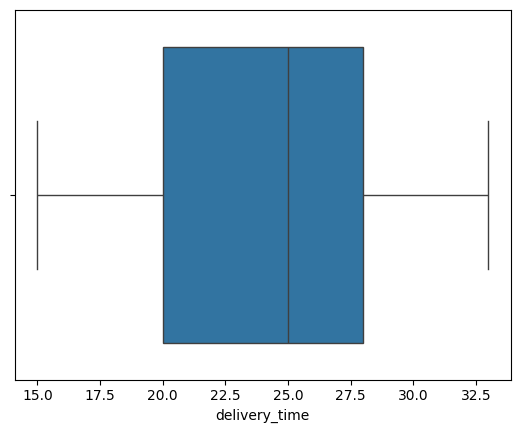

In [85]:
# Write the code here
sns.boxplot(data=df, x="delivery_time")

In [86]:
print(f"The mean order delivery time is: {round(df['delivery_time'].mean(),2):.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time is: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [87]:
# Write the code here
top_3_customer = df['customer_id'].value_counts().head(3)
top_3_customer

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
Top 3 frequent customers has customer_ids 52832 , 47440 and 83287 placed 13, 10 and 9 orders respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

**Checking the correlation between numeric variables in the data**

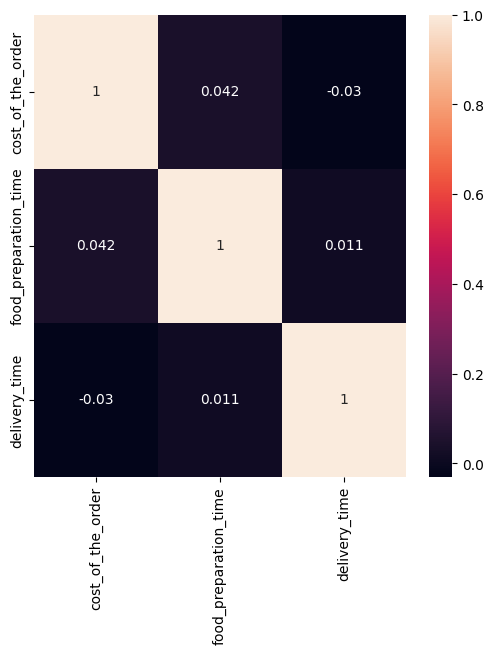

In [88]:
# select numeric columns
numeric_cols = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

There are no strong correlations  between the numeric variables.

Moving on to explore relationships between other features

**Day of the Week vs Delivery time**

In [89]:
df.groupby('day_of_the_week')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


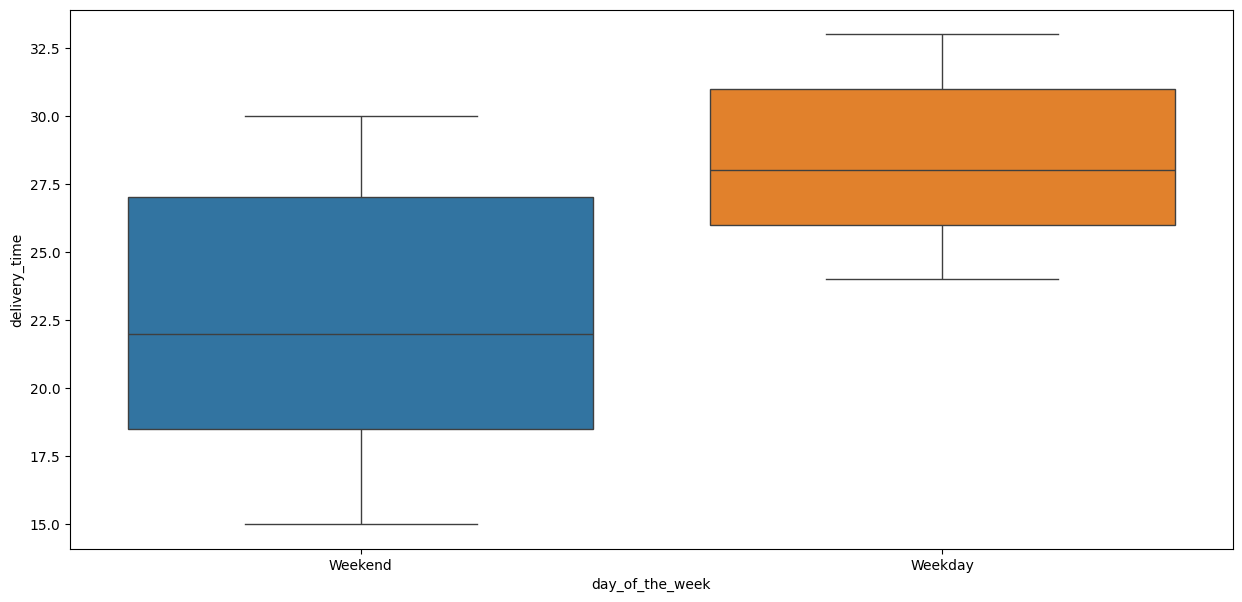

In [90]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df,hue='day_of_the_week')
plt.show()

Observation

*    We see higher delivery times in the weekdays mean at 28 mins compared to
weekends with mean delivery times 22
*    There is a wider range in delivery times in the weekends

**Looking at the relationship between rating and cost of order**

In [91]:
df.groupby('rating')['cost_of_the_order'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,188.0,16.223351,7.840886,4.75,12.0425,14.120,21.8300,33.37
4,386.0,16.710337,7.632996,4.75,12.1300,14.160,22.7875,35.41
5,588.0,16.965697,7.448696,4.47,12.1300,15.205,22.8000,33.03
Not given,736.0,16.085340,7.327540,4.66,11.8275,14.070,21.5000,34.19


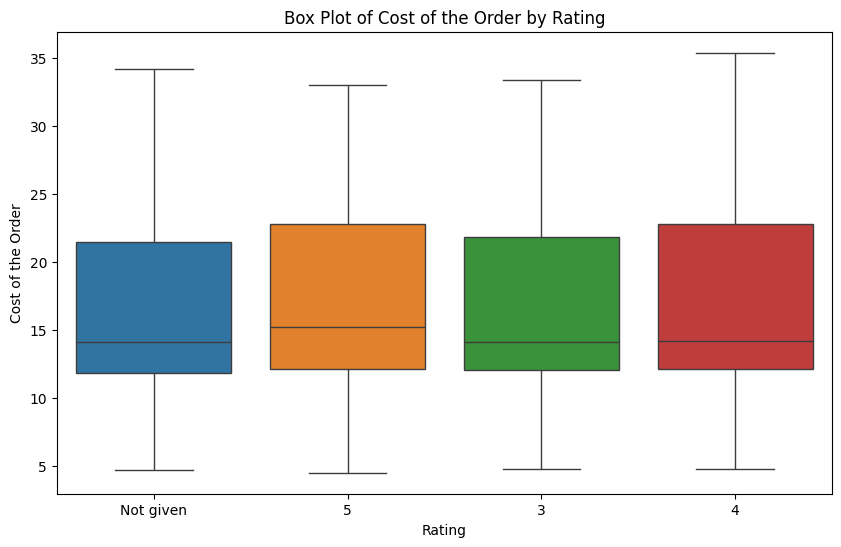

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df,hue='rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.title('Box Plot of Cost of the Order by Rating')
plt.show()

#### Observation
There is no notable difference between the distribution of cost of food with rating. It seems that there is no relatinoship between these 2 variables


**Looking at the relationship between rating and total time taken for delivery**


Create a new column called total time :
Total time  = food preperation time + Delivery time

In [93]:
#Add column for total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


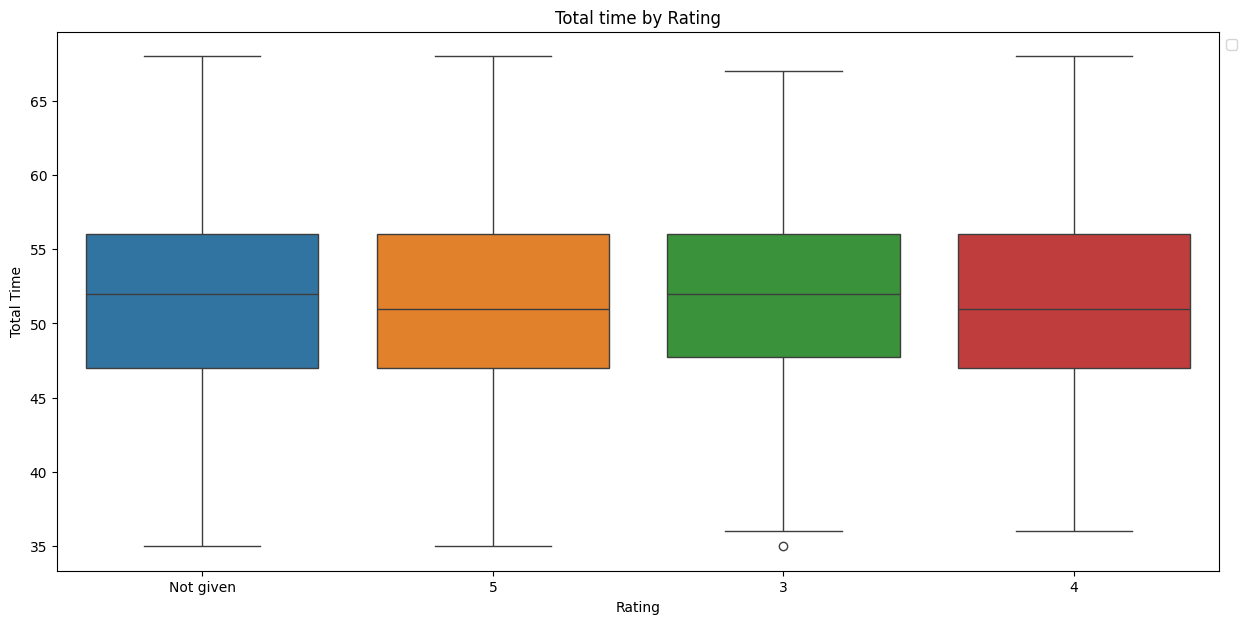

In [94]:
#create a boxplot to show relationship between ratings and total time
# categorical vs numeric continuous
plt.figure(figsize=(15, 7))
sns.boxplot(data=df,x='rating',y='total_time', hue='rating')
plt.title('Relationship between Rating and Total Time')
plt.ylabel('Total Time')
plt.xlabel('Rating')
plt.title('Total time by Rating')
# Adjust the legend placement
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Observation
Again , there is no notable difference between the distribution of Total Time with rating. It seems that there is no relatinoship between these 2 variables

**Looking at the relationship between rating and delivery time**

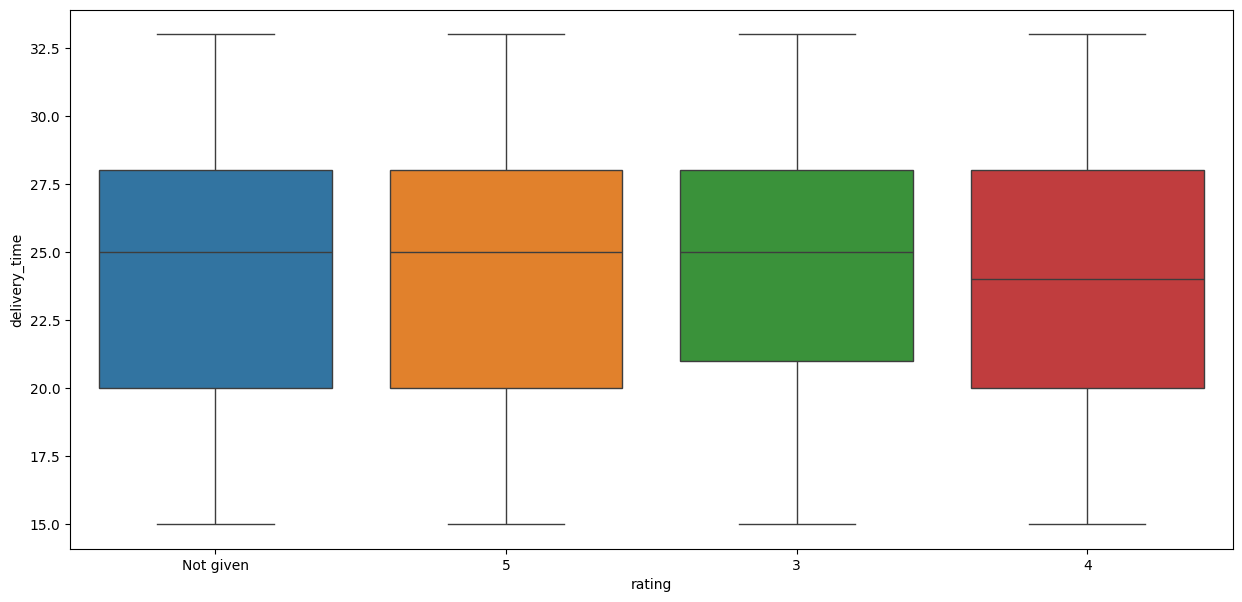

In [95]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df,hue='rating')
plt.show()

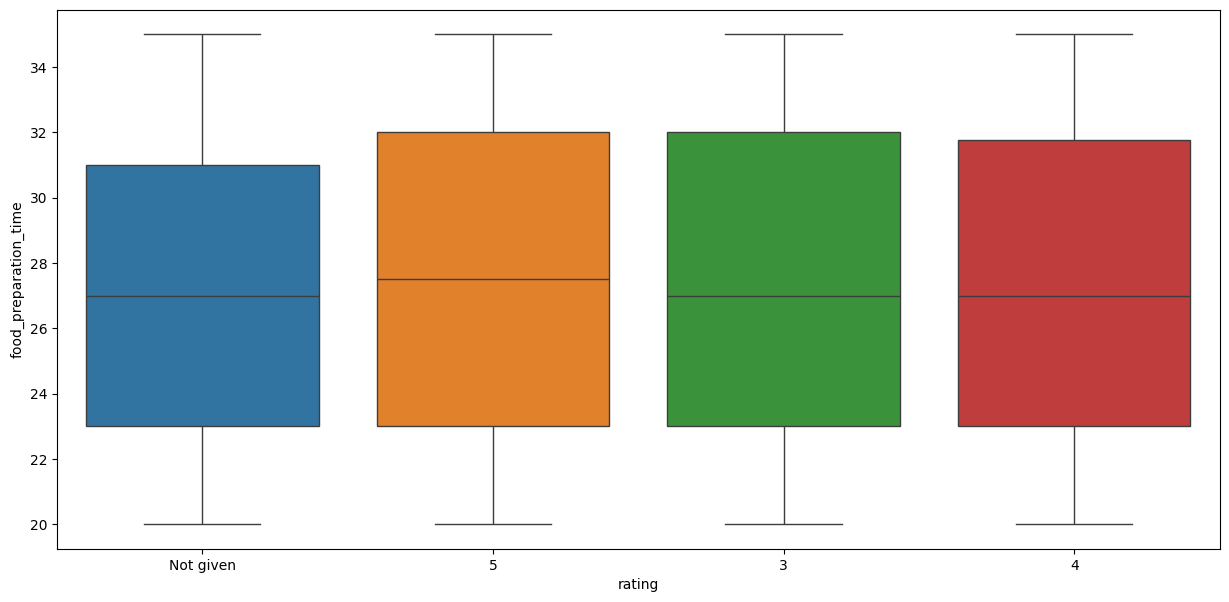

In [96]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df,hue='rating')
plt.show()

#### Observation
There is no notable difference between the distribution of delivery and food preperation time with rating. It seems that there is no relatinoship between these 2 variables


**Looking at the relationship between rating and cost of order**

In [97]:
df.groupby('rating')['cost_of_the_order'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,188.0,16.223351,7.840886,4.75,12.0425,14.120,21.8300,33.37
4,386.0,16.710337,7.632996,4.75,12.1300,14.160,22.7875,35.41
5,588.0,16.965697,7.448696,4.47,12.1300,15.205,22.8000,33.03
Not given,736.0,16.085340,7.327540,4.66,11.8275,14.070,21.5000,34.19


#### Observation
There is no notable difference between the distribution of delivery and food preperation time with rating

**Revenue generated by the restaurants in descending order**

In [98]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

**Looking at the relationship between rating and cuisine type**

By Cuisine type, see what is the mean ratings.
ratings is a object type so running a mean function on it will casue an error.

By visual confirmation of the distribution of features in the filted dataset containing rating "not_given"  and the original dataset it seems like all features (except rating) closely resembles the distribution of the original dataset.**There seems to be no pattern to how the missing data in ratings feature came about and it is completely random**

because there are no exceptions to this part of the data it is safe to assume that we can ommit it to expect the same results.
Replace "Not given" with NaN and continue analysis for mean rating against cuisine type

In [99]:
ratings_not_given= df[df['rating']=='Not given']

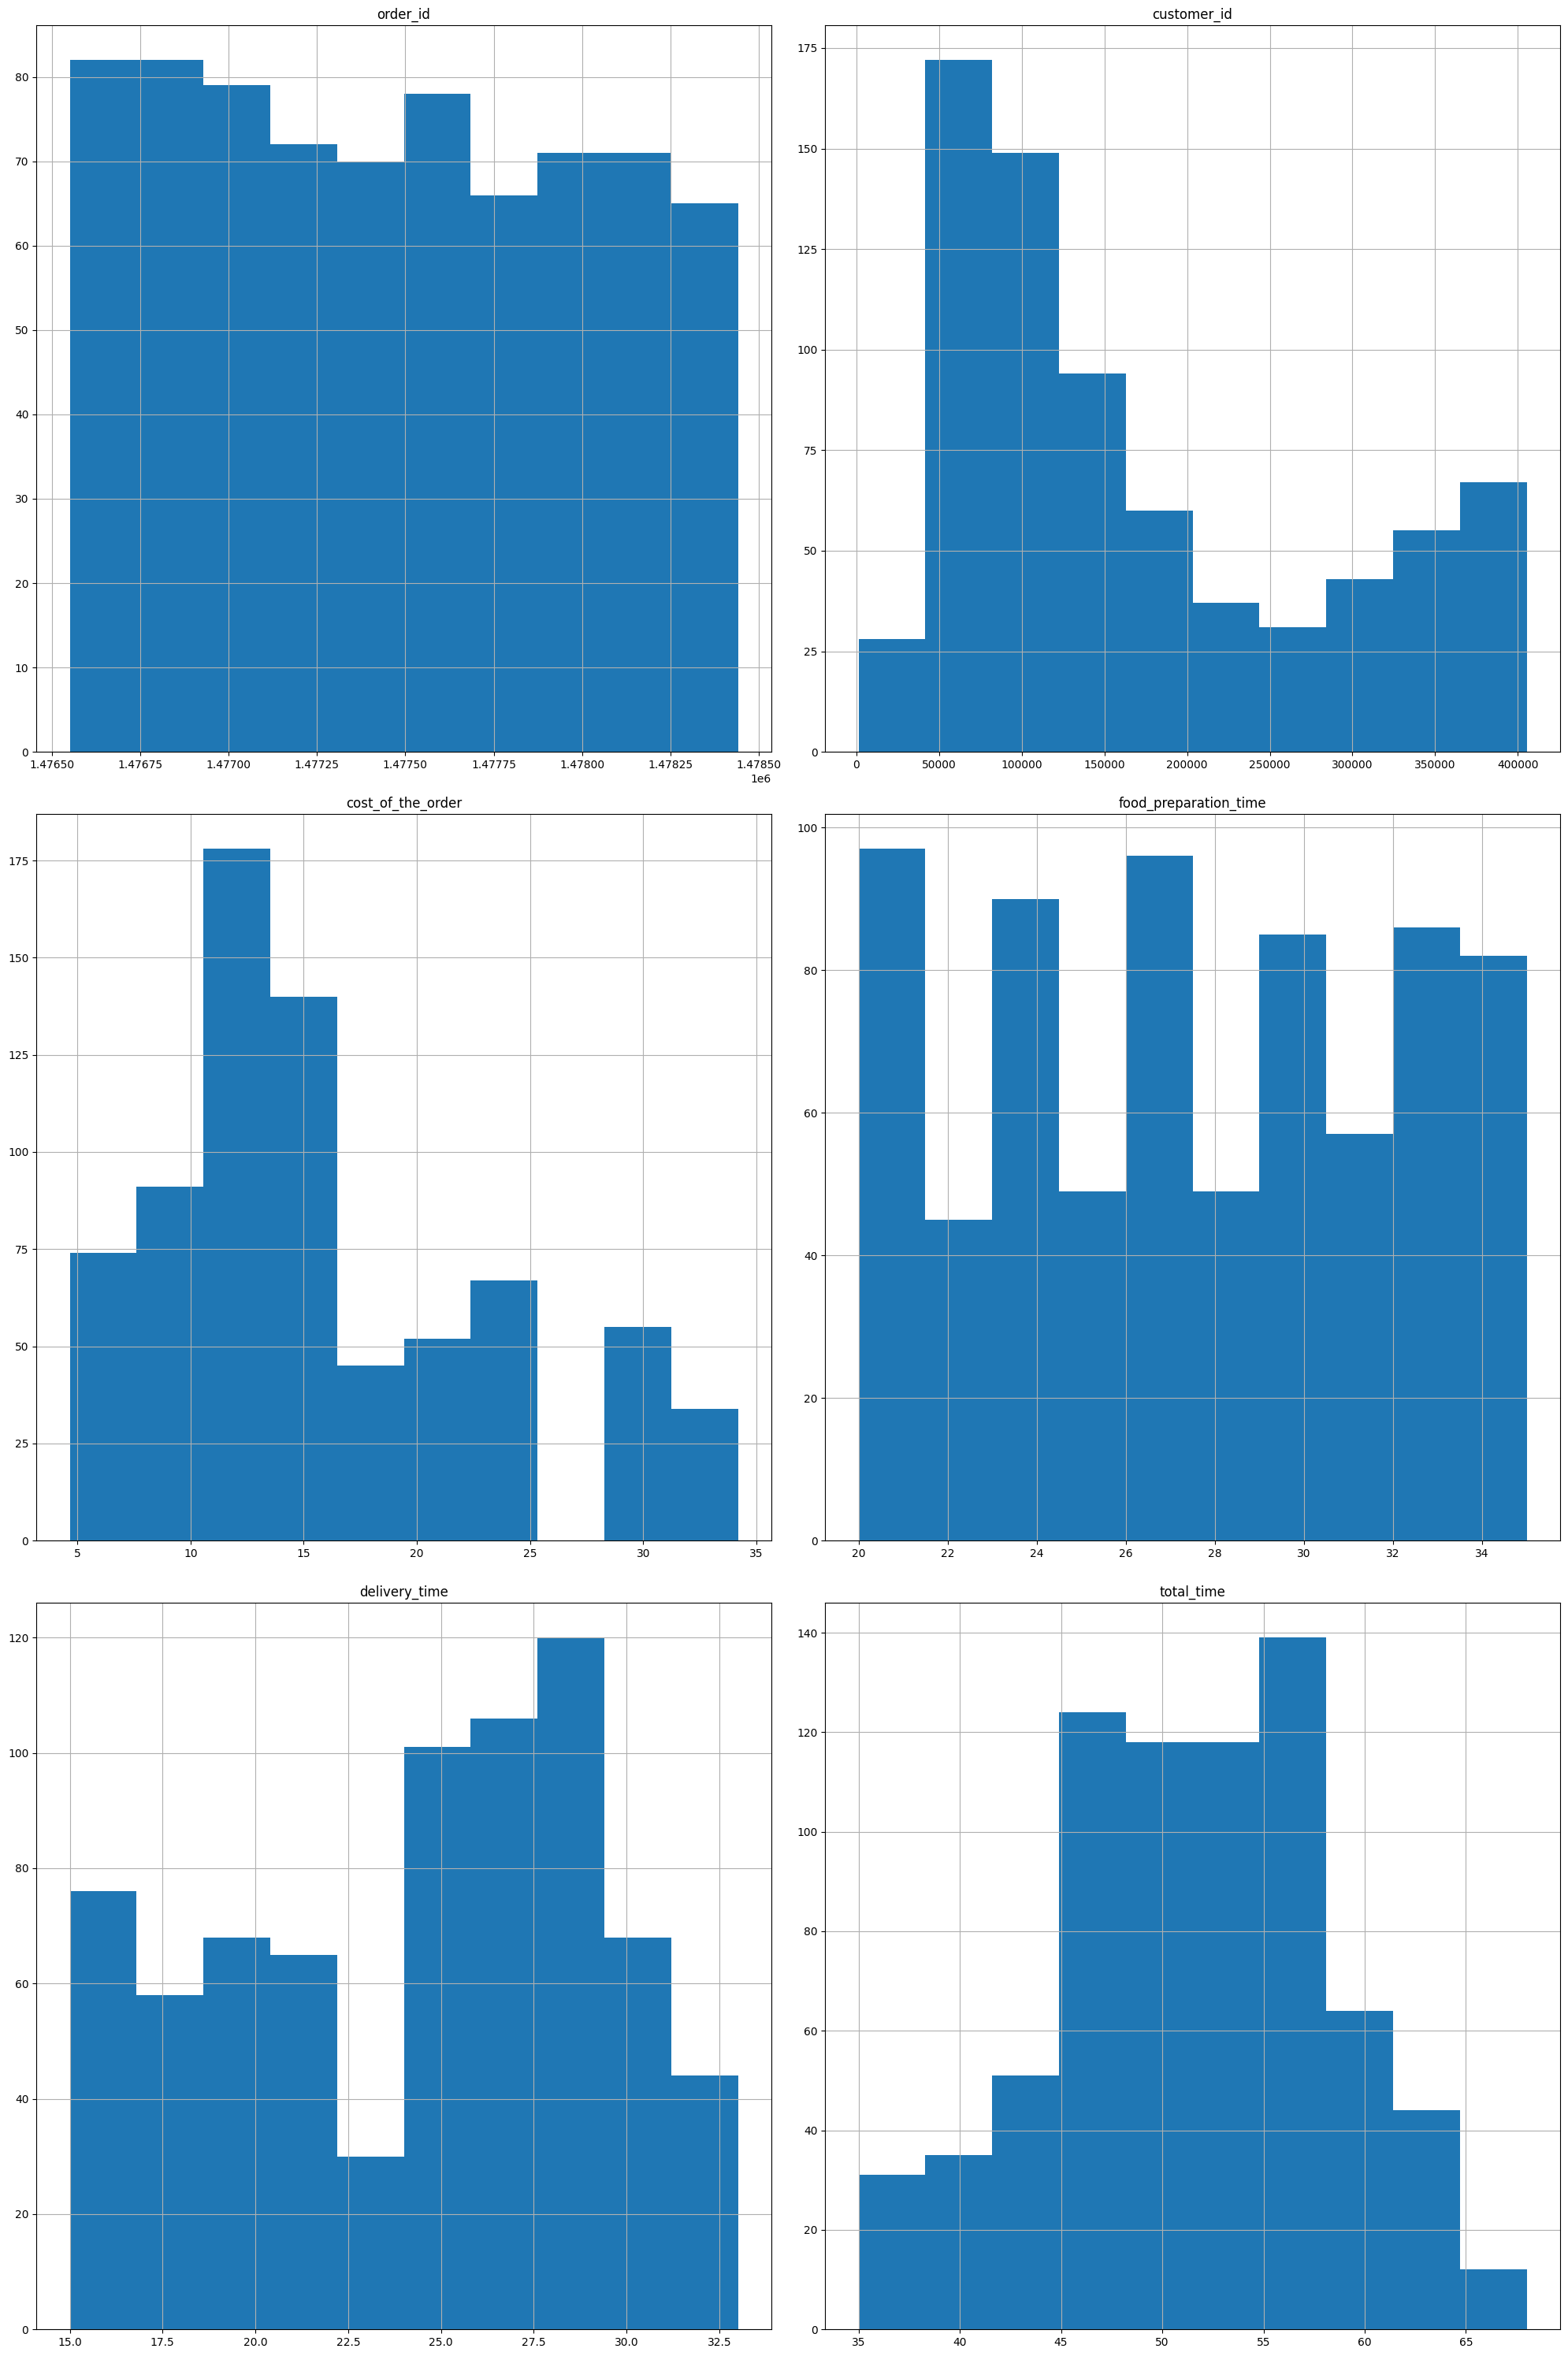

In [100]:
ratings_not_given.hist(figsize=(20,30))
plt.tight_layout()
plt.show()

In [101]:
ratings_not_given.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time
count,7.360000e+02,736.000000,736.00000,736.000000,736.000000,736.000000
mean,1.477457e+06,169951.230978,16.08534,27.357337,24.173913,51.531250
std,5.481139e+02,112404.907207,7.32754,4.562942,5.041021,6.941278
min,1.476551e+06,1311.000000,4.66000,20.000000,15.000000,35.000000
25%,1.476971e+06,79245.000000,11.82750,23.000000,20.000000,47.000000
50%,1.477449e+06,128600.000000,14.07000,27.000000,25.000000,52.000000
75%,1.477926e+06,263669.250000,21.50000,31.000000,28.000000,56.000000
max,1.478441e+06,405334.000000,34.19000,35.000000,33.000000,68.000000


**Replace not given with NaN**

In [102]:
#Replace "Not given" with NaN
df['rating'] = df['rating'].replace('Not given', np.nan)

In [103]:
#Convert to Numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [104]:
# Write the code here
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
restaurant_ratings

,count,mean
restaurant_name,,
'wichcraft,1,5.000000
12 Chairs,2,4.500000
5 Napkin Burger,2,4.000000
67 Burger,1,5.000000
Alidoro,0,NaN
...,...,...
Zero Otto Nove,1,4.000000
brgr,1,3.000000
da Umberto,1,5.000000


In [105]:
meet_criteria = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
meet_criteria

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
Restaurants that fulfil the criteria of having count of more than 50 ratings and a average rating of more than 4 are : Shake Shack , The Meatball Shop , Blue Ribbon Sushi and Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [106]:
# if order cost > 20 company commission= 0.25*order_cost
# if order cost > 5 company commission= 0.15*order_cost
# Define calculate comission function
def calculate_commission(order_cost):
    if order_cost > 20:
        return order_cost * 0.25
    elif order_cost > 5:
        return order_cost * 0.15
    else:
        return 0

In [107]:
# Apply the function to the cost_of_the_order column to calculate the revenue for each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)
# Sum up the total revenue
total_revenue = df['commission'].sum()
# Display the total revenue
print(f"Total revenue generated by the company: ${total_revenue:.2f}")

Total revenue generated by the company: $6166.30


#### Observations:
Total revenue generated by the company: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [108]:
# total time column already generated earlier in question 12 : multivarite analysis
# Added column for total time   : df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,commission
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,1.7385


In [109]:
time_above_60 = df[df['total_time'] > 60]
# number of rows for orders above 20 dollars
delivery_time_above_60 = above_20dollars.shape[0]
delivery_time_above_60

555

In [110]:
#number of rows in dataset would give total number of rows in cost_of_the_order
delivery_time_all_orders= len(df['total_time'])

In [111]:
print(f"The percentage of orders that more than 60mins to get delivered from time order is placed is: {(delivery_time_above_60/delivery_time_all_orders)*100:.2f}%")

The percentage of orders that more than 60mins to get delivered from time order is placed is: 29.24%


#### Observations:
The percentage of orders that more than 60mins to get delivered from time order is placed is: 29.24%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [112]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time of weekdays is 28 mins whereas the mean delivery time of weekends is 22 mins

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
**Observations on Customer Demand:**
1.   Top 5 most popular cuisines are American 30.7% , Japanese 24.7%, Italian 15.7% , Chinese  11.3% and Mexican 4% or these 5 cuisine categories makes up 70% of total orders

2.   Most of the food orders comes form weekends 71.7% compared to weekday orders 28.1% . There is a significant preference for ordering on weekends.

**Top restaurants to work with**
1. Top 5 restaurants that received the most orders are Shake Shack, The Meatball Shop , Blue ribbon sushi , blue ribbon fried chicken and parm which accounts for about 33.1% of the orders

2. Restaurants that fulfil the criteria of having Count of more than 50 ratings and average ratings above 4 are : Shake Shack, The Meatball Shop , Blue ribbon sushi , blue ribbon fried chicken

**Customer Ratings**
1. Address the absence of ratings below 3, which could indicate a potential data filtering issue. Ensure the rating system accurately reflects customer feedback.


### Recommendations:

*  Promote top restaurants like Shake Shack, The Meatball Shop, and Blue Ribbon Sushi to leverage their popularity.

* Focus on increasing the number of high-value orders (above $20) to boost revenue.

* Investigate reasons for longer delivery times on weekdays and strategize to improve efficiency. Implement measures to reduce preparation and delivery times, especially on weekends when the demand is higher.

* Implement measures to reduce missing customer ratings, such as post-delivery feedback reminders or incentives for reviews.

* Address the absence of ratings below 3, which could indicate a potential data filtering issue.

---